 # R Basics: first demo

The objective here is to start familaiarizing with R.

As you see the characetr '#' is udes to idetify lines of comments they are not interpreted and are useful for us to kee track of the process of analysis

As discussed, "assignment" (sending somethingin the workspace) is done using '<-' the shrotcut to insert it is 'ALT' + '-'. 
If you will be using RStudio, a complete list of shortcut can be found in the menu under 'tools'

In [1]:
## Variable Assignement

# these are two numbers, and R is case sensitive!
a <- 1
A <- 2

# this is a string
mystring <- "fmach"   ## note the double quotes

# this is a boolean
myboolean <- TRUE

Run the code and ispect your workspace (environnment) as you see R is case sensitive ...

How can I see what I have inside my workspace?

In [3]:
## this is a function (note the parenthesis)
ls()

[1] "a"         "A"         "myboolean" "mystring"

## Multidimensional Objects
A simple multidimensional object (a vector) is created by a function c()

In [5]:
## with this command I create a vector "concatenating" the numbers from one to four

myvector <- c(1,2,3,4)

## and this is the help for c! ... if I do not rememeber what c is actually doing
?c


As we discussed, **multidimensional** objects can be accessed either by position of by name. This second way is possible only if the objects inside the multidimensionale "container" have names ...

In [6]:
## assignment by name
u <- c("carlo" = 2, "due" = 10)

## how can I look inside a multidimensional object?
myvector[3]
u["due"]
         
         

## or only change the second element of my object
myvector[2] <- 30

## this gives me the third element of the  vector, remember that the first element in the 
## remember that R is counting from one and not zero


[1] 3

due 
 10

1,6,11,16,21
2,7,12,17,22
3,8,13,18,23
4,9,14,19,24
5,10,15,20,25


In [7]:
## if I want to construct a 2d array ...

myarray <- matrix(seq(1,25,1), nrow = 5, ncol = 5)

myarray

1,6,11,16,21
2,7,12,17,22
3,8,13,18,23
4,9,14,19,24
5,10,15,20,25


More on multidimensional objects ...

In [14]:
## the content can be accessed
myarray[2,3] ## one element
myarray[1,]  ## one row!

## square brakets can be used in a quite flexible way to select elements
## matching specific properties

myarray[myarray > 10]
myarray[myarray[1,] >3,]

## when you have multidimensional objects it is often useful give
## a name to the eleents

vector.with.names <- c("one" = 1, "two" = 2, "three" = 3)

## in this way I can access the second element either as
vector.with.names[2]
##or
vector.with.names["two"]

## with two dimensional or more dimensional objects rownames and colum names are useful
## exactly as in excel

[1] 12

[1]  1  6 11 16 21

[1] 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25

2,7,12,17,22
3,8,13,18,23
4,9,14,19,24
5,10,15,20,25


two 
  2

two 
  2

## The first assignment!

Just to check if all the ideas are more or less clear, I propose you a very easy assignement:

* create a vector which contains the name of each month of the year
* create a second vector which contains the number of days of each month
* create a vector which contein tha (aproximate) season which each month belongs to
* mount the three vector into a data frame

In [10]:
## The Solution

## this is the vector with the nonths
mymonths <- c("Jan","Feb","Mar",
              "Apr","May","Jun",
              "Jul","Aug","Sep",
              "Oct","Nov","Dec")

## this is the vector with the days
days <- c(31,28,31,30,31,30,31,31,30,31,30,31)

## this is the vector with the approximate season
season <- c(rep(c("winter","spring","summer","autumn"), each = 3))

## here I'm mounting itnto a data.frame ... note the argument stringsAsFActors. Check it in the documentation 
## of the data.frame function (?data.frame)
yeardf <- data.frame("month" = mymonths, "length" = days, "season" = season,
                     stringsAsFactors = FALSE)

## here I'm transforming the season in to a factor 
yeardf$season <- factor(yeardf$season)


## if I would like a lisr, instead ...
yearlist <- list("month" = mymonths, "length" = days, "season" = season)
yearlist[["length"]]


[1] 31 28 31 30 31 30 31 31 30 31 30 31

In [12]:
## this print out the results ... note the three different variable types
yeardf

month,length,season
<chr>,<dbl>,<fct>
Jan,31,winter
Feb,28,winter
Mar,31,winter
Apr,30,spring
May,31,spring
Jun,30,spring
Jul,31,summer
Aug,31,summer
Sep,30,summer


# Data visualization

The objective is to buold-up data manipulation skills with R and _ggplot_

In [15]:
## I load my first package!
library(tidyverse)

## and also some data
data(mpg)

## as we discussed this shows the first lines of the data.frame
head(mpg)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.1     ✔ dplyr   1.0.0
✔ tidyr   1.1.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact


### Data Description
This dataset contains a subset of the fuel economy data that the EPA makes available on http://fueleconomy.gov. It contains only models which had a new release every year between 1999 and 2008 - this was used as a proxy for the popularity of the car.


In [16]:
## a first glance on the data
summary(mpg)

 manufacturer          model               displ            year     
 Length:234         Length:234         Min.   :1.600   Min.   :1999  
 Class :character   Class :character   1st Qu.:2.400   1st Qu.:1999  
 Mode  :character   Mode  :character   Median :3.300   Median :2004  
                                       Mean   :3.472   Mean   :2004  
                                       3rd Qu.:4.600   3rd Qu.:2008  
                                       Max.   :7.000   Max.   :2008  
      cyl           trans               drv                 cty       
 Min.   :4.000   Length:234         Length:234         Min.   : 9.00  
 1st Qu.:4.000   Class :character   Class :character   1st Qu.:14.00  
 Median :6.000   Mode  :character   Mode  :character   Median :17.00  
 Mean   :5.889                                         Mean   :16.86  
 3rd Qu.:8.000                                         3rd Qu.:19.00  
 Max.   :8.000                                         Max.   :35.00  
      hwy    

## Plots!
And now we look at plots!

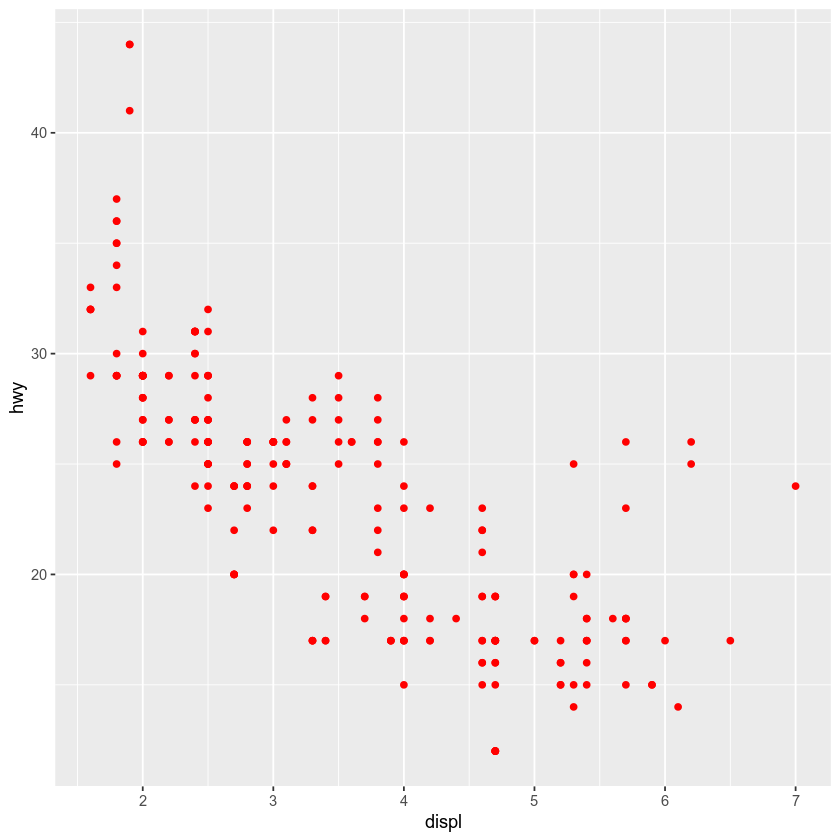

In [17]:
## my first plot .... engine displacement, miles per gallon

ggplot(data = mpg) +
    geom_point(mapping = aes(x = displ, y = hwy), col = "red")
    


This goes a little bit farer away

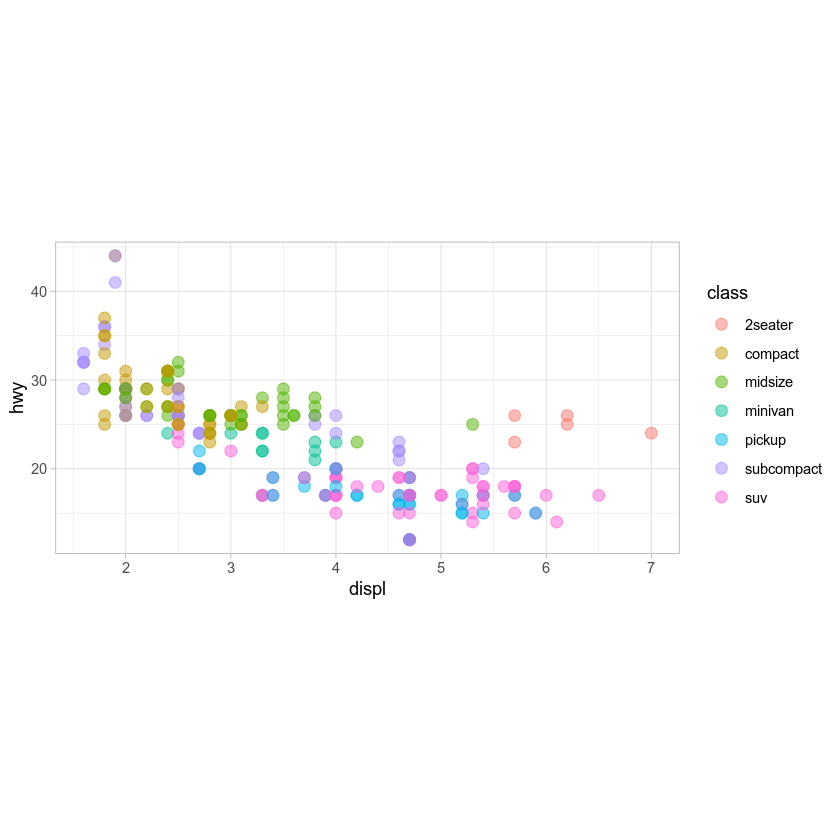

In [18]:
ggplot(data = mpg) +
    ## on the canvas plot points linking their eastetics to the column names!
    geom_point(mapping = aes(x = displ, y = hwy, col = class),  
               size = 3, 
               alpha = 0.5) +
    ## add additional general aestetics
    theme_light() +
    theme(aspect.ratio = 0.5)

What aesthetics could I use? another time ....

In [1]:
?geom_point

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



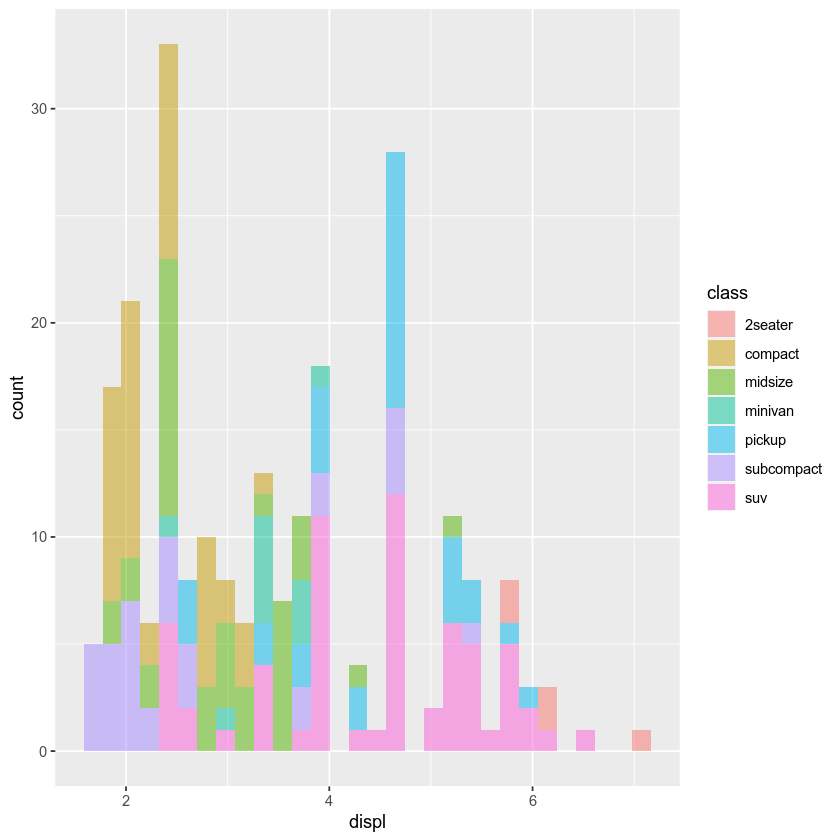

In [19]:
## histograms, scales free
ggplot(data = mpg) +
  geom_histogram(mapping = aes(x = displ, fill = class), alpha = 0.5) 

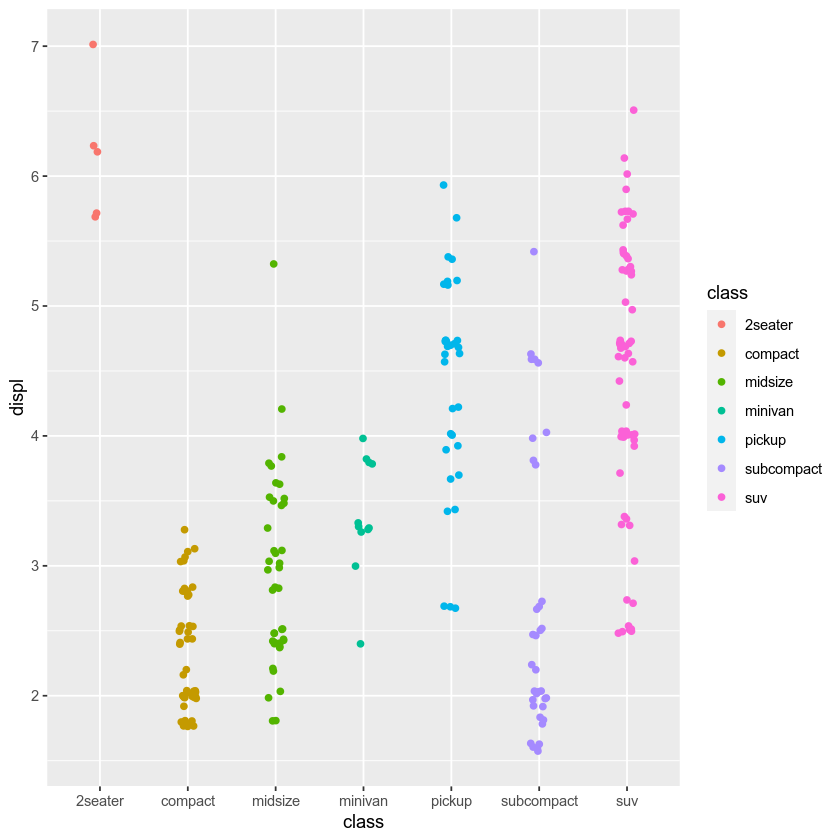

In [20]:
## Or jitter!
ggplot(data = mpg) +
  geom_jitter(mapping = aes(x = class, y = displ, col = class), width = 0.1)


This is some "material" for your assignment ;-)

## Assignment #1

1. Play around with mpg changing the type of plots 
2. Associate aesthetics to categorical or continuous properties
3. Make a boxplot of "displ" as a function of the class of the vehicle
4. Just play and ask!

## Splitting the plot in subplots

As we discussed, faceting is used to split a plot in different subpanels on the bases of a categorical variable, which is normally present in the data.frame/tibble

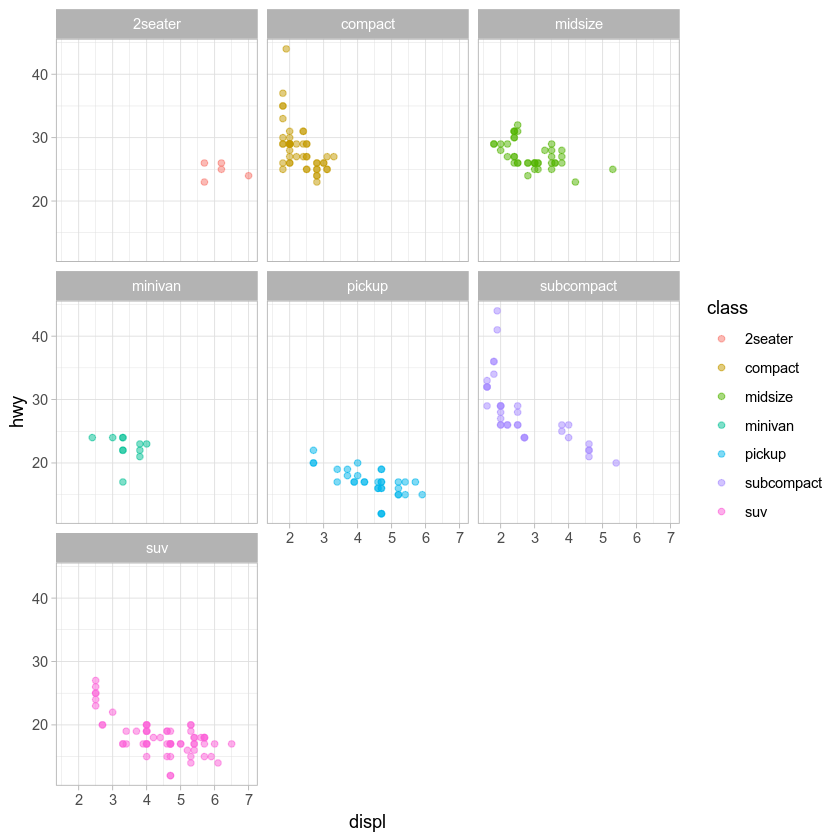

In [21]:
## group specific subplots
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy, col = class), alpha = 0.5) +
  facet_wrap(~class) + 
  theme_light() 

With the previous command all the plots have the same scale, this behavior can be controlled by setting the `scales` argument inside the facet_wrap() call.

## From wide to long data.frames

As we discussed in the lecture, a clever combination of reshaping and faceting can be used to plot in a unique plot a series of different properties (column).

To do that, a data frame in wide form should be transformed in its "long" counterpart.

In [22]:
## the function "pivot longer" goes from wide to long format. To do that it is necessary to provide the name 
## of two new columns: the one which will store the variable names and the one which will collect the values
## here we call them "Property" and "value"


mpglong <- pivot_longer(mpg, 
                        cols = c("displ","cty","hwy"),  ## these are the names of the column we are "collecting"
                   names_to = "Property", 
                   values_to = "Value")  

head(mpglong)

manufacturer,model,year,cyl,trans,drv,fl,class,Property,Value
<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>
audi,a4,1999,4,auto(l5),f,p,compact,displ,1.8
audi,a4,1999,4,auto(l5),f,p,compact,cty,18.0
audi,a4,1999,4,auto(l5),f,p,compact,hwy,29.0
audi,a4,1999,4,manual(m5),f,p,compact,displ,1.8
audi,a4,1999,4,manual(m5),f,p,compact,cty,21.0
audi,a4,1999,4,manual(m5),f,p,compact,hwy,29.0


## Make a full plot of all the properties ...

We use now the long data frame 

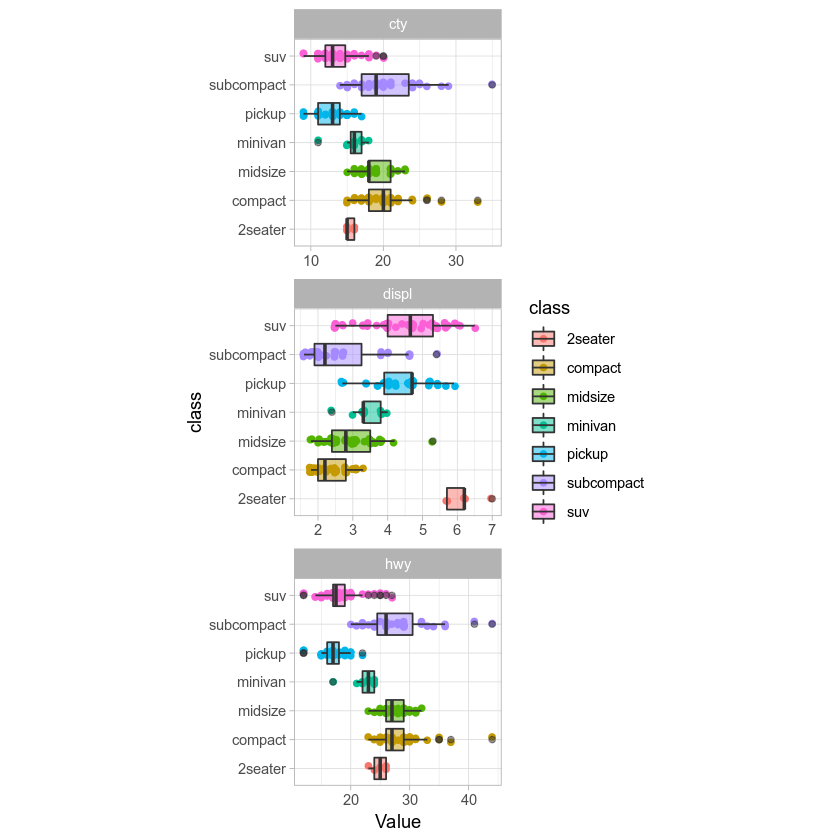

In [27]:
ggplot(mpglong) + 
    geom_jitter(aes(x = class, y = Value, col = class), width = 0.1) + 
    geom_boxplot(aes(x = class, y = Value, fill = class), alpha = 0.5) +    
    facet_wrap(~Property, scales = "free", ncol = 1) + 
    coord_flip() +         ### switch the axis to show the names ...
    theme_light() +
    theme(aspect.ratio = 1)
    

## Iris data
The last part of this practical is dedicated to the Iris dataset, which is also available in R

In [28]:
## here is the starting of the story ....
data(iris)

head(iris)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa


## Assignment #2
1. Look for correlation between  Sepal.Length and Sepal.Width (Petal.Length and Petal.Width) for the three iris varieties
2. Make a faceted boxplot showing the four iris properties as a function of the species  





